This notebook is copy from "Smile Or Not | CNN with validation accuracy = 95% (NOURHAN MAHMOUD AHMED)" with some edited. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 1. Loading image 

In [2]:
# locate train and valid directory
train_dir = '/kaggle/input/smiling-or-not-face-data'
test_dir = '/kaggle/input/smiling-or-not-face-data/test/*'

In [3]:
img_size = (64, 64)

In [4]:
# Normalize the pixel values
trainDataGenerator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
testDataGenerator = ImageDataGenerator(rescale=1./255)

In [5]:
# Read the img from the folder 
train_set = trainDataGenerator.flow_from_directory(
     train_dir ,
     classes=["non_smile", "smile"],
     color_mode="rgb",
     batch_size=16,
     target_size=img_size,
     class_mode="binary",
     subset="training")

valid_set = trainDataGenerator.flow_from_directory(
    train_dir ,
    classes=["non_smile", "smile"],
    color_mode="rgb",
    batch_size=16,
    target_size=img_size,
    class_mode="binary",
    subset="validation")

Found 963 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [6]:
train_set[0][0][0].shape

(64, 64, 3)

In [7]:
print(train_set.class_indices)

{'non_smile': 0, 'smile': 1}


(16, 64, 64, 3)
(16,)
class: 1.0


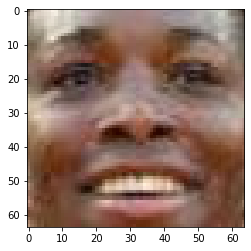

In [8]:
# visulize sample img and class label; 'non_smile': 0, 'smile': 1 
for image_batch, labels_batch in train_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  plt.imshow(image_batch[5])
  print('class:', labels_batch[5])
  break

## 2. Building the CNN model

In [9]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras import callbacks
from keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score

In [10]:
model = keras.Sequential([
    Conv2D(128,(3,3), input_shape=(64,64,3),  activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(64, activation="relu"),
    Dropout(rate=0.2),
    # the linear output layer 
    Dense(1,  activation="sigmoid")
])

In [11]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                802880    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [12]:
callback = EarlyStopping(monitor="val_accuracy",patience=10)

In [13]:
history = model.fit(train_set, validation_data = valid_set, epochs=40, verbose =1, callbacks = callback)

Epoch 1/40
61/61 [==============================] - 9s 123ms/step - loss: 0.6711 - accuracy: 0.5805 - val_loss: 0.5970 - val_accuracy: 0.7917
Epoch 2/40
61/61 [==============================] - 7s 109ms/step - loss: 0.4416 - accuracy: 0.8048 - val_loss: 0.2849 - val_accuracy: 0.9042
Epoch 3/40
61/61 [==============================] - 7s 109ms/step - loss: 0.2719 - accuracy: 0.8858 - val_loss: 0.3363 - val_accuracy: 0.8708
Epoch 4/40
61/61 [==============================] - 8s 126ms/step - loss: 0.2269 - accuracy: 0.9117 - val_loss: 0.1958 - val_accuracy: 0.9292
Epoch 5/40
61/61 [==============================] - 7s 111ms/step - loss: 0.1820 - accuracy: 0.9294 - val_loss: 0.1499 - val_accuracy: 0.9583
Epoch 6/40
61/61 [==============================] - 7s 109ms/step - loss: 0.1420 - accuracy: 0.9585 - val_loss: 0.1510 - val_accuracy: 0.9542
Epoch 7/40
61/61 [==============================] - 7s 110ms/step - loss: 0.1514 - accuracy: 0.9398 - val_loss: 0.1639 - val_accuracy: 0.9417
Epoch 

## 3. Model evaluation
- using loss and accuracy

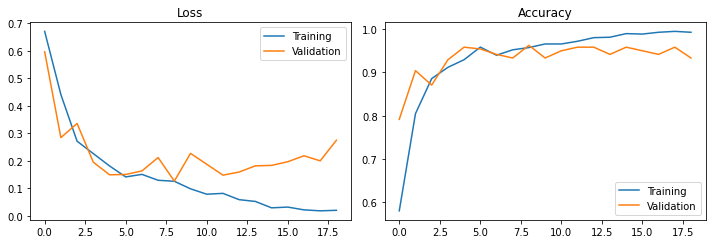

In [14]:
plt.figure(figsize = (10,3.5))
plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history.history['loss'], label = 'Training')
plt.plot(history.history['val_loss'], label = 'Validation')
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label = 'Training')
plt.plot(history.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
accuracy = model.evaluate(valid_set, verbose = 0)
print(f'Score: {accuracy[1]:.3f}')

Score: 0.933


## 4. Predict class of images

In [16]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def smile_nonsmile(list):
  y_pred = []
  y_pred_classification = []
  img_list = []
  
  for i in list:
    img = load_img(i, target_size = img_size)
    img = img_to_array(img)
    img /=255.0
    img_list.append(img)

    img = np.expand_dims(img, axis = 0)
    y_pred_i = model.predict(img)
    y_pred_classification_i = 'smile' if y_pred_i > 0.5 else 'non-smile'
    y_pred.append(y_pred_i)
    y_pred_classification.append(y_pred_classification_i)

  return img_list, y_pred_classification, y_pred

In [17]:
import glob 
import os.path

In [18]:
# This will take some times because large number of test images 
mylist = [f for f in glob.glob(test_dir)]
img_list, y_pred_classification, y_pred  = smile_nonsmile(mylist)

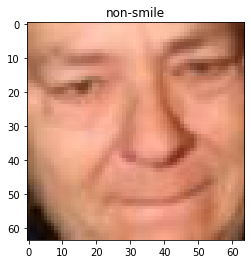

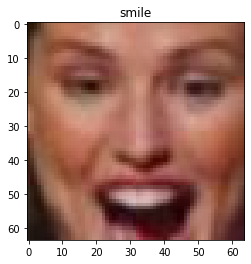

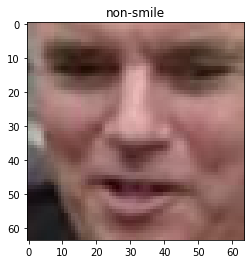

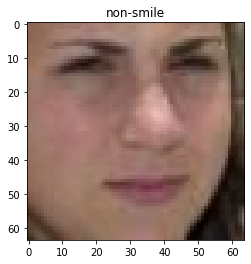

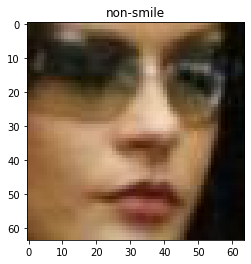

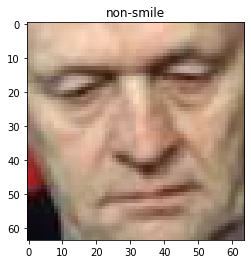

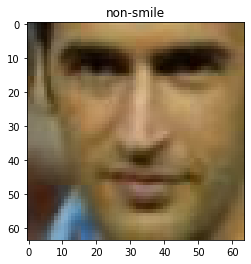

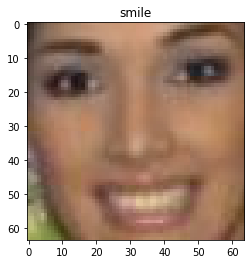

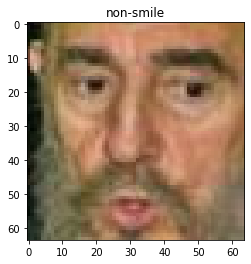

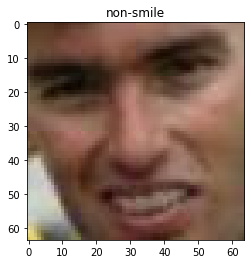

In [19]:
for i in range(10):
  plt.imshow(img_list[i])
  plt.title(f'{y_pred_classification[i]}')
  plt.show()